In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# for the 3d surface plot, can use this backend to allow for interactive rotation and zooming
#%matplotlib notebook 
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 8in by 6in

# Video W1 05: Model Representation

[YouTube Video Link](https://www.youtube.com/watch?v=PBZUjnGuXjA&index=5&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

## Some Examples and Notation

As the motivating example for this video, we are using a simple data set 
of housing prices in Portland Oregon.  The data can be found in a comma
separated values files (csv) in the data subdirectory underneath the
lectures directory in our class repository.  

Lets first load the data into a pandas data frame.  This data consists
of only a bit more than 40 houses, and all we have for each house is
the size (in square footage) and the price of the house.  In this example
we want to try and build a model that can predict the selling price
of a house given the size of the house in square footage.

Next we read the house price data into a pandas data frame, and we
do some simple cleaning.  In the video they only use/show houses of
less than 3000 square feet, and the prices is represented in 1000s of
dollars. So we show some examples of using pandas data frames and
simply NumPy vectorized operations to limit the dataframe to this
desired data.

In [2]:
house = pd.read_csv('data/housing-prices-portland-or.csv')
house = house[house.sqft < 3000]   # in video we only use houses < 3000 sq ft
house.price = house.price / 1000.0 # in video we specify prices in 1000s of $

Lets do a simple visualization of our data.  We'll create a scatter plot of the
independent variable (the size of the houses) vs. the selling price.  This
scatter plot should be identical to the one seen in the video.

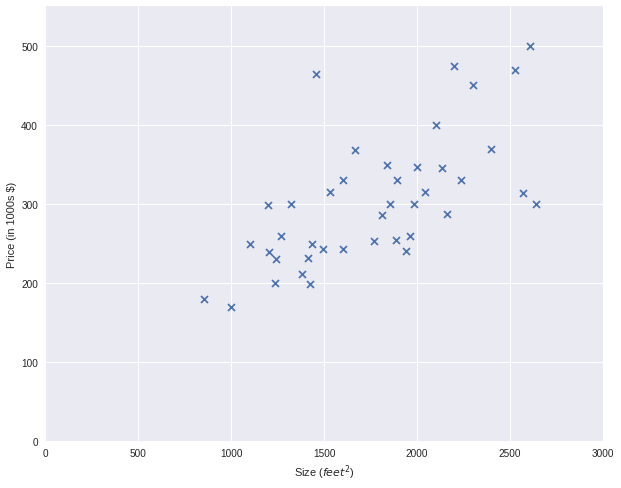

In [3]:
plt.scatter(house.sqft, house.price, marker='x')
plt.axis([0, 3000, 0, 550])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)');

Let's show an example of using some built in Python methods to fit a line to the data.
Here we use the `NumPy` library to fit a polynomial to the data, in this case a 
straight line. This is actually an example of performing linear regression, which we
will learn how to perform in these videos and examples.  But in the figure we
produce next, the red line corresponds to the model or hypothesis, the same as
the line drawn in the video to represent the data.

In [4]:
# fit a line (degree 1 polynomial) to the data
coef = np.polyfit(house.sqft, house.price, 1)
hypothesis = np.poly1d(coef)

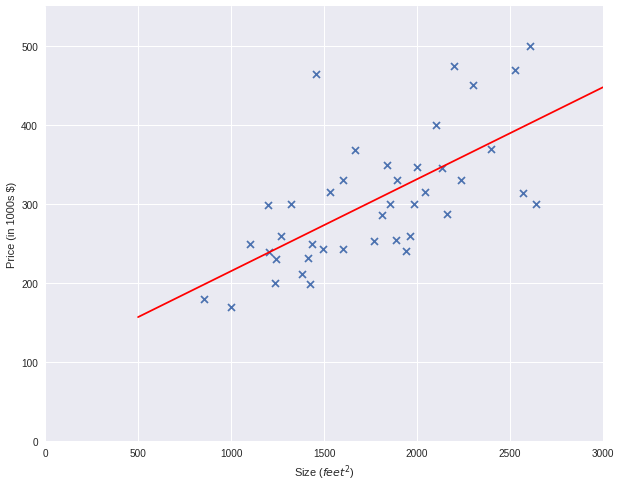

In [5]:
# ask model to predict prices for all sizes from 500 to 3000 sq ft
size = np.arange(500, 3000, 1) 
estimated_price = hypothesis(size)

# replot raw data
plt.scatter(house.sqft, house.price, marker='x')
plt.axis([0, 3000, 0, 550])
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price (in 1000s $)')

# overlay the fitted model (the calculate best fit line or linear regression)
plt.plot(size, estimated_price, 'r-');

In the video, the lecturer discusses the concept of **Supervised Learning**.
The idea is we want to build a model representation or hypothesis
of the relationship between the size of a house in the Portland house
market and its selling price.  The video shows the lecturer eyeballing
a linear relationship between size and selling price.  Above we found
a best fit solution of such a line.  We will be learning how to calculate
the best fitting line in this lecture.  Also you should know that this
example is an example of a **Regression Problem**.  Here we are trying to
model or predict a real-valued output from a single input variable.

But once we have the hypothesis or model, we can then make predictions.
For example, in the video, a hypothesis is shown for a house of 1250
square feet.  In the previous figure, the red line represents our best
fit model, or the best hypothesis we can make about what the price of
a house should be for any given size.

In the next cell lets see what the hypothesized selling price should be
for a house of 1250 square feet in size. As you can see, the model price
for the best fit line is about 243k in this case (a bit higher than the
lecture guessed in the video, but of course he was only eyeballing a
hypothesized model there).

In [6]:
# what is the estimate of model for house of size 1250 square feet?
# about 243k, given our data
print(hypothesis(1250))

244.194074015


Formally in supervised learning we have a data set.  The data set consists of
1 or more input variables (also known as the independent variables, and
always plotted using the x axis) and a
variable of interest, the output variable or the dependent variable (always
plotted using the y axis).  You can
have more than one dependent variable as well, but we usually just create separate
regression models for each output dependent variable of interest for the given
input variables.

In the course, we will be following the standard notation used in the ML
community and in our course videos.  

- $\mathbf{m}$ = Number of training examples
- $\mathbf{x}$'s = "input" variable / feature (also known as independent variable(s))
- $\mathbf{y}$'s = "output" variable / "target" variable (also known as dependent variable)

In our training set data, we have the following for m, x, y

In [7]:
# note that there are 47 training examples in the full data set,
# but we filtered out houses bigger than 3000 sqft, and ended up 
# with only 41 that we plotted
m = len(house) 
print("Number of training examples: ", m)

# an example of converting from a pandas data frame to a numpy matrix/array
# this will be useful later...
x = house.sqft.as_matrix() 
print(x)

y = house.price.as_matrix()
print(y)


Number of training examples:  41
[2104 1600 2400 1416 1985 1534 1427 1380 1494 1940 2000 1890 1268 2300 1320
 1236 2609 1767 1888 1604 1962 1100 1458 2526 2200 2637 1839 1000 2040 1811
 1437 1239 2132 2162 1664 2238 2567 1200  852 1852 1203]
[ 399.9    329.9    369.     232.     299.9    314.9    198.999  212.
  242.5    239.999  347.     329.999  259.9    449.9    299.9    199.9
  499.998  252.9    255.     242.9    259.9    249.9    464.5    469.     475.
  299.9    349.9    169.9    314.9    285.9    249.9    229.9    345.     287.
  368.5    329.9    314.     299.     179.9    299.9    239.5  ]


It might be easier to represent this as a table where each row represents
a house data point as shown in the videos.  Here is one way to get this
table by using the pandas dataframe ability to print data in a tabular format.

In [8]:
house[['sqft', 'price']]

,sqft,price
0,2104,399.900
1,1600,329.900
2,2400,369.000
3,1416,232.000
5,1985,299.900
6,1534,314.900
7,1427,198.999
8,1380,212.000
9,1494,242.500
10,1940,239.999


Given we have assigned the training input sizes to the `x` variable and the
training output prices to the `y` variable, we can access the ith training
item using array indexing.  Recall that in the videos, we are using the notation:

$$( x^{(i)}, y^{(i)} )$$

as explained, this is not meant to representing raising to a power.
This means we want the ith elements of the `x` and `y` vectors.  We can
get the ith element from the numpy arrays using array indexing:

In [9]:
# arrays are indexed starting at 0 in python, just as an example
# lets get the items at index 5
i = 5 

# display the ith input and the ith output, if you look on the previous
# plots you should see this plot pointed in the figure as an x
print(x[i], y[i]) 

1534 314.9


So the 5th house is 1534 square feet, and has a selling prices of 314.9
thousand dollars (e.g. $314,900)

**NOTE:** Be careful with indexing.  In the videos, and in math, indexes start
at 1.  But in many programming languages, including Python, indexing into
arrays and vectors begin at 0.  Thus the first element is actually at index
0, and the second at index 1, etc:

In [10]:
print(x[0])
print(x[1])
print(y[0])
print(y[1])

2104
1600
399.9
329.9


## How do we represent h?

Recall that 'h' is a function that maps from 'x' to 'y'.  At this point
we don't know how to represent 'h', nor how to find the best 'h', but
the purpose of the Supervised Learning learning algorithm is to find
a good 'h' for a given training set, where 'good' will get a formal
definition here in a bit.

In the video, some hypothesis or model $\theta$ is defined to be represented as:

$$h_\theta(x) = \theta_0 + \theta_1 x$$

This is the equation for a straight line, with $\theta_0$ specifying the
intercept of the line and $\theta_1$ giving the slope.  So for
**Linear Regression** learning algorithms, we are assuming and/or fitting
a straight line (linear) model to the given training set data.

When we used the numpy `polyfit` function, we were basically fitting a
straight line to the data, and  this line represents a model, or a hypothesis,
of the relationship of the size to the cost of the house that we should predict.
The coefficients we returned from calling the `polyfit` function represent the
slope and intercept of the straight line that best fit the data.  In the video,
these coefficients are represented as $\theta_0$ (the intercept) and $\theta_1$
(the slope) for the line.  In future, we will probably use a variable name of
theta to hold these coefficients:

In [11]:
theta = np.polyfit(house.sqft, house.price, 1)
print(theta[0], theta[1])

0.116296798317 98.8230761191


Using `polyfit` the intercept is actually returned in index 1, and the slope is in index
0, so this is different from what is shown on the slides, but these are
basically the coefficients we are talking about.

But notice then that the intercept is just below 100, which if you look back
at the figure looks correct. The slow is given as 0.1162, which means that for
every square feet of increase in house size, the price of the house increases
by $0.1162 \times 1000 = \$ 116.20 $.

For example, the hypothesis, or model estimate, for some size house, say 1250
square feet, can be found using `numpy`, or by hand, like this:

In [12]:
size = 1250
hypothesis = np.poly1d(theta)
print(hypothesis(size))

print(theta[1] + theta[0] * size)

244.194074015
244.194074015


The `np.poly1d` function from NumPy simply takes a NumpyArray of values and
returns assumes they are the parameters for a polynomial.  The result is that
you can think of hypothesis as a function that returns the calculated
value, as we did by hand directly using the second method.

This then is an example of **linear regression with one variable**, also known
as univariate linear regression.  We will look at multivariate linear regression
later, which simply allows us to have more than 1 input feature, for
example along with the square feet size of the house, we might include
the number of bedrooms and the house age, which might help to create a
more accurate prediction model from the data.

# Video W1 06: Cost Function

[YouTube Video Link](https://www.youtube.com/watch?v=EANr4YttXIQ&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=6)


To make the previous a little more explicit, lets write our own hypothesis
function.  We will assume that $\theta_0$ is the intercept and $\theta_1$
is the slope in our function so we match the notation in the video (again
note that this is the reverse of how the `np.poly1d` function works).

This is an example of a NumPy vectorized function.  Both `theta` and `x`
need to be NumPy arrays.  The statement that calculates the h return value
is actually performed as a vectorized operation.  So whatever the shape
of the input x array is, the resulting h that is returned will be the same
shape, and each value of h corresponds to calculating the hypothesis
captured by the theta parameter for the model.

In [13]:
def my_hypothesis(theta, x):
    '''Vectorized function that calculates the hypothesis given by the
    theta parameters for all values of x.  theta is assumed to be
    a numpy vector with 2 values in it that specify a slope and intercept
    of the hypothesized line.  x is a numpy vector of input features.
    This function returns the corresponding hypothesized y values for each
    input x feature.
    
    Parameters
    ----------
    theta - a NumPy array of shape (2,1) theta[0] is the intercept and
       theta[1] is the slope of the hypothesis we are to calculate.
    x - a NumPy array of features.  
    
    Returns
    -------
    h - This function returns h, the hypothesized values where 
       h = theta[0] + theta[1] * x.  h should be the same size and
       shape of the input feature x array
    '''
    h = theta[0] + theta[1] * x
    return h

With this function, we can recreate different hypothesized models and plot
them, recreating the figures shown in this video.

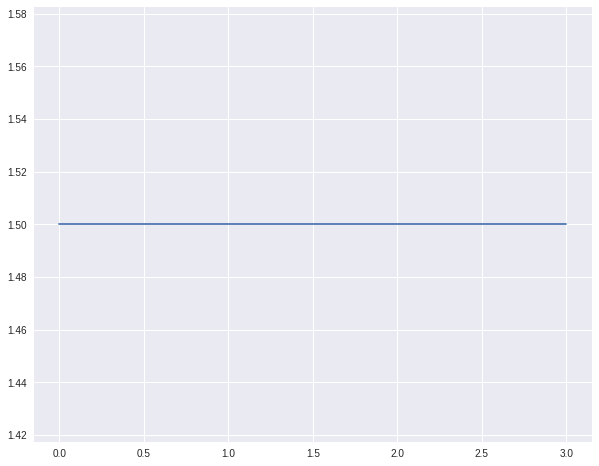

In [14]:
# create 100 values equally distributed from 0 to 3.0 to represent the
# x inputs we want to calculate a hypothesis for
x = np.linspace(0.0, 3.0, 100)

# theta_0 intercept = 1.5, theta_1 slope = 0
theta = np.array([1.5, 0])

# plot the hypothesized model corresponding to this
# slope and intercept
plt.plot(x, my_hypothesis(theta, x));

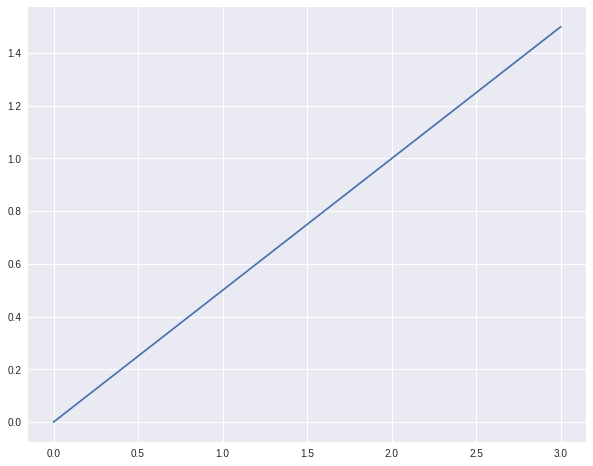

In [15]:
# theta_0 intercept = 0, theta_1 slope = 0.5
theta = np.array([0, 0.5])

# plot the hypothesized model corresponding to this
# slope and intercept
plt.plot(x, my_hypothesis(theta, x));

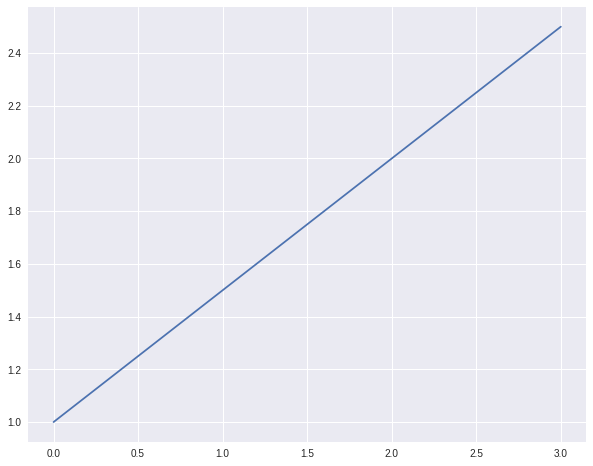

In [16]:
# theta_0 intercept = 1, theta_1 slope = 0.5
theta = np.array([1, 0.5])

# plot the hypothesized model corresponding to this
# slope and intercept
plt.plot(x, my_hypothesis(theta, x));



## How to choose parameters

Previously we used a built in `numpy` method to choose the $\theta$ parameters
for us for our hypothesis.  Now we will see how this is actually done
algorithmically.

We do this by formulating the problem in terms of a minimization.  So the
idea is, for some set of parameters $\theta$ that is a hypothesis, we
can define a cost function:

$$
cost = (h_\theta(x) - y)^2
$$

The cost function is simply stating that we take the difference between
our hypothesis or model $h_\theta(x)$ and the actual output $y$, and
then we square this difference.

This cost is only in terms of 1 particular input value $x$.  As stated in
the video, if we want to know the overall cost, which is a measure of
how well the $\theta$ parameters work as our model,
we need to sum up the cost over all of the input training patterns:

$$
cost = \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)} \big)^2
$$

And as stated in the video, we multiply this cost by $\frac{1}{2m}$ for
reasons we will talk about later. To recap this video then, the goal is
to find some value for $\theta_0$ and $\theta_1$ such that the
calculated total cost is the minimum for any possible values of
the $\theta$ parameters.

By convention, we use the notation $J$ for the cost function, and
write it as:

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)} \big)^2
$$

This function is commonly known as the squared error cost function
(also sometimes called the squared difference).

To recap, this final expression of the cost function (also known as
an objective function) means that we want to
find the values of $\theta_0$ and $\theta_1$ so that it causes the minimum
possible value that we can achieve for the defined cost function, which is
the summed up squared difference of all of the training data actual outputs
from the hypothesized outputs.  The cost function developed here is commonly
known as the squared error cost function.  Other cost functions are possible,
and we will explore some of them later.  But this function is still very
commonly used in many machine learning contexts.

# Video W1 XX: Cost Function Intuition I

**NOTE:** This video is missing from youtube.  Here is an alternative link:

[Alternate Video Link Cost Function intuition 1](https://www.youtube.com/watch?v=oeDewhKxnRw)


## Building intuition about the cost function

Lets recap.  Here are our hypothesis, model parameters, cost function, and optimization objectives:

**Hypothesis:** $h_\theta(x) = \theta_0 + \theta_1x$

**Parameters:** $\theta_0, \theta_1$

** Cost Function:** 
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)} \big)^2$$

**Goal:** 
$$\genfrac{}{}{0}{}{\textrm{minimize}}{\theta_0, \theta_1} \;\; J(\theta_0, \theta_1)$$

## Simplified Definition

In order to build up to understanding how minimization of cost functions work, lets simply our problem.
Lets work on minimizing the set of models where we always choose the intercept paramter to be through
the origin, e.g. $\theta_0 = 0$.  If we do this, then our simplified minimization problem we are working
on is:

**Hypothesis:** $h_\theta(x) = \theta_1x$

**Parameters:** $\theta_1$

** Cost Function:** 
$$J(\theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)} \big)^2$$

**Goal:** 
$$\genfrac{}{}{0}{}{\textrm{minimize}}{\theta_1} \;\; J(\theta_1)$$

Lets write a little function to calculate the cost function $J$ for a single parameter
$\theta_1$ as shown in this video.  We will first define the simple x input values, and
y output values as:

In [17]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

Now lets write a small function in Python to calculate the sum squared cost, given a particular hypothesis
$\theta_1$.  This function assumes that the training inputs $x$ and outputs $y$ are already defined
outside of the function, and simply accepts a single parameter, theta1, as a function parameter:

In [18]:
def cost_function(theta1):
    """Given a theta1 parameter for our simplified hypothesis h(x) = theta1 * x,
    calculate the sum squared difference cost function.  This function assumes that
    the training inputs are in a variable called x, and the correct outputs are in
    a variable called y, defined outside of this function"""
    m = len(x) # training set size
    sum = 0.0  # calculate the running sum squared error
    
    for i in range(0, m):
        sum += ((theta1 * x[i]) - y[i])**2.0
        
    return (1.0 / (2.0 * m)) * sum

Now as shown in the video, lets see what cost we get for a $\theta_1$ of 1, 0.5, 0.0, etc:

In [19]:
print(cost_function(1.0))
print(cost_function(0.5))
print(cost_function(0.0))
print(cost_function(-0.5))
print(cost_function(1.5))
# etc.

0.0
0.583333333333
2.33333333333
5.25
0.583333333333


Lets show the visualization of how the simplified cost function changes
as a function of our $\theta_1$ parameter.  To do this, we are first
going to digress into a very important topic, the idea of performing
vectorized operations, and writing a vectorized Python function.
Our cost function is actually a (poorly written, but more on that later)
vectorized function.  Vectorized function in this context means that the
function will accept a vector (a `numpy` array) of theta values, and it
will compute and retun an array of the costs for each of the theta
parameters.  For example:


In [20]:
theta = np.arange(-0.5, 3.0, 0.5)
print(theta)
print(cost_function(theta))

[-0.5  0.   0.5  1.   1.5  2.   2.5]
[ 5.25        2.33333333  0.58333333  0.          0.58333333  2.33333333
  5.25      ]


How is our function doing this?  This works because numpy arrays work such
that operations between arrays, such as addition and multiplication, are
vectorized to work on multiple values simultaneously.

Take for example multiplying theta parameters by the input values x for
the 0th input. If we do this step by hand, we get:

In [21]:
theta * x[0]

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

These represent the hypothesis for input 0 that we are making.  This is an
example of a vector operation where we multiple a scalar value (`x[0]`
is a simple floating point value) by a vector.

Likewise the subtraction of this array of values from the `y` output values
is a vector operation:

In [22]:
theta * x[0] - y[0]

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

Also, raising a numpy array of values to a power is a vector operation:

In [23]:
(theta * x[0] - y[0])**2.0

array([ 2.25,  1.  ,  0.25,  0.  ,  0.25,  1.  ,  2.25])

These are the operations that are performed inside of the loop in the
function.  Notice that this loop loops over all of the training
input/output pairs, from 0 to `m`.  We will later show how to eliminate 
this explicit loop using linear algebra matrix operations.

However, given that we can calculate the cost function for many
different $\theta_1$ parameters, we can reproduce the visualization
of how the cost varies as a function of $\theta_1$ for our simplified
hypothesis:

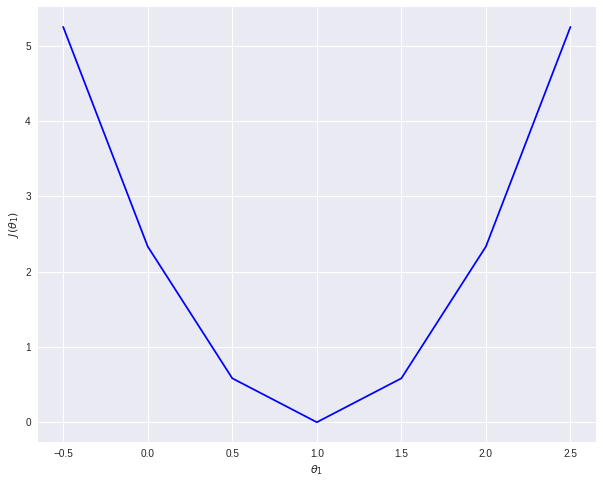

In [24]:
plt.plot(theta, cost_function(theta), 'b-')
plt.xlabel('$\\theta_1$')
plt.ylabel('$J(\\theta_1)$');

Whenever you are performing discrete vectorized calculations, you can end
up with jagged plots like this if you don't investigate your function
with enough resolution.  The cost function is actually a smooth function.
We can get a better feel for the true shape of the cost function by
plotting more points in the range that we want to visualize:

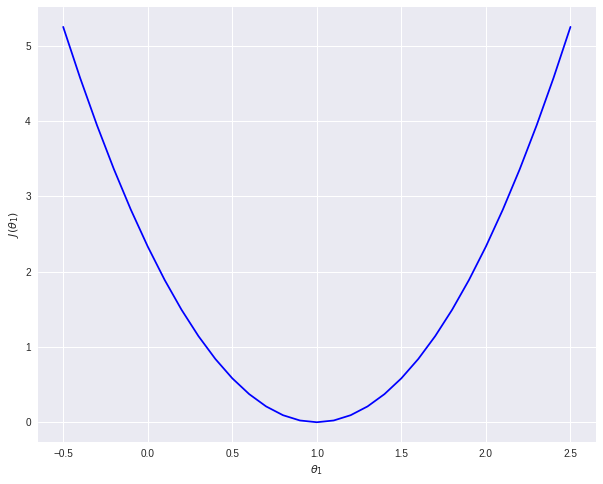

In [25]:
# theta1  parameters from -0.5 to 2.5 in 0.1 increments
theta = np.arange(-0.5, 2.6, 0.1) 
plt.plot(theta, cost_function(theta), 'b-')
plt.xlabel('$\\theta_1$')
plt.ylabel('$J(\\theta_1)$');

To recap, for this simplified cost function, each value of $\theta_1$ 
corresponds to a different possible straight line fit model.
And for each value of $\theta_1$ we can then calculate the cost
function that results from that particular hypothesized $\theta_1$.

The cost is 0 when $\theta_1 = 1.0$ because for that model the line
exactly fits all of the training data (thus the error or difference
is 0 for all of the training inputs).  But for any other value of
$\theta_1$ the hypothesized line will not go through the input
data points, and thus the cost will be greater since we square
and sum the differences, the result always has to be greater than
0.

This is an important demonstration, make sure you understand the
relationship between a particular $\theta_1$ hypothesis and its
calculated cost.  Also you should see that there is only 1
minimum value of the cost function.  This is not a
coincidence, and this will always be the case for the sum squared
error cost function.  We will return to this observation in a bit.
Also you should note that
for a more complex set of training data, you might not know which
value of $\theta_1$ results in the minimum cost.  But if you pick
any starting value for $\theta_1$ and then start following the
gradient in the direction that lowers the cost, you will eventually
arrive at the minimum point.  This is basically how the gradient
descent algorithm works, which we will develop in just a bit below.

# Video W1 07: Cost Function Intuition II


[YouTube Video Link](https://www.youtube.com/watch?v=J5vJFwQWOaY&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=7)


## Cost Function of Two Parameters

We are now going to expand the simplification of our cost function description
to include two parameters of $\theta$. As a reminder, the hypothesis, cost
function and goal when we expand too consider two parameters needed to
fit a straight line to the data give us the following:

**Hypothesis:** $h_\theta(x) = \theta_0 + \theta_1x$

**Parameters:** $\theta_0, \theta_1$

** Cost Function:** 
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)} \big)^2$$

**Goal:** 
$$\genfrac{}{}{0}{}{\textrm{minimize}}{\theta_0, \theta_1} \;\; J(\theta_0, \theta_1)$$


Let us expand our previous vectorized cost function to accept 
two $\theta$ parameters.  The way this function will work is that 
each corresponding value of theta will represent a pair of parameters,
$\theta_0$, $\theta_1$, and the resulting array will give
the cost for each pair of parameters.  An example in code might be
easier to understand:

In [26]:
# as before, this function assumes that x and y are already defined outside of the 
# function.  Lets switch over to using the Portland house price data, as is done in this video
x = house.sqft.as_matrix()
y = house.price.as_matrix()

def cost_function_2(theta0, theta1):
    """Given theta0 and theta1 parameters for our hypothesis h(x) = theta0 + theta1 * x,
    calculate the sum squared difference cost function.  This function assumes that
    the training inputs are in a variable called x, and the correct outputs are in
    a variable called y, defined outside of this function"""
    m = len(x) # training set size
    sum = 0.0  # calculate the running sum squared error
    
    for i in range(0, m):
        sum += ((theta0 + theta1 * x[i]) - y[i])**2.0
        
    return (1.0 / (2.0 * m)) * sum

In [27]:
# some examples of pairs of theta parameters, as discussed in the video
theta0 = np.array([50, 80, 200])
theta1 = np.array([0.06, 0.1, 0.03])

print(cost_function_2(theta0, theta1))

[ 13185.42975862   3042.83715862   3978.97232691]


## 3D Surface Plot of Cost Function for 2 Theta Parameters

Let's use our cost function to reproduce the 3D plot from the video.
The lecturer in the video calls all of these contour plots, but in
matplotlib, the first more 3d plots are usually called surface plots.
We need to create two arrays called theta0 and theta1 in python.  As shown
in the video, we want both values to vary from -20 up to 10.  And we want
all combinations to occur, so for example when theta0 is -20, we need to 
generate many examples for theta1 ranging from -20 to 10, then for then
theta0 is -19, etc. We can use the `numpy` function `meshgrid` to create
all of these combinations for us.  This function is specially designed
for making contour plots like this one (an example of  the `meshgrid`
function and contour plots was given in Lecture 2b on matplotlib).

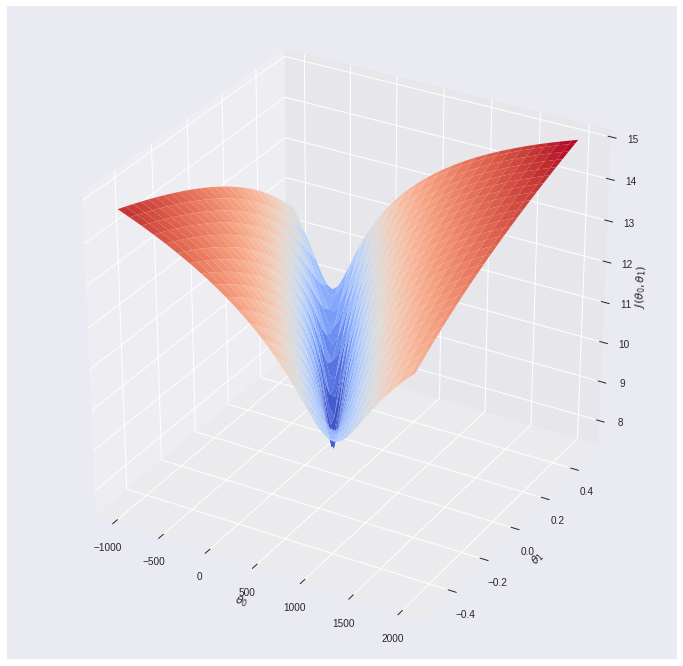

In [28]:
#%matplotlib qt

# create the theta0, theta1 combinations
t0 = np.linspace(-1000, 2000, 50)
t1 = np.linspace(-0.5, 0.5, 50)
theta0, theta1 = np.meshgrid(t0, t1)

cost = cost_function_2(theta0, theta1)


# create the contour plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_surface(theta0, theta1, np.log(cost), rstride=2, cstride=2, cmap=plt.cm.coolwarm)
#ax.view_init(0.0,0.0) # change this to rotate the view
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0, \\theta_1)$');



This figure does not exactly look like the figure in the lecture video.
The lecture video is only using an idealized surface plot,
in order to better illustrate the bowl shape of the function in 3
dimensions.  In the surface plot we have displayed here, we have
used the actual cost function of our training data, though we have
plotted the log of the cost function, so that we
can better see the shape.  The figure is a bit irregular, but
there is a deep valley that you can see, leading down to the minimum
cost point for this data.  You should try rotating the view to
different positions, so that you can better visualize the cost
function of the two parameters.

## Contour Plot Visualization

Lets now recreate the actual contour plots.  The following example is
very important in building your intuition between the relationship
between a fitted hypothesis / model, and the cost function.

The next cell has a lot of code in it.  It basically recreates the
side by side plots, showing the data with a fitted hypothesis on the
left plot, and a contour plot with the hypothesis theta parameters indicated.

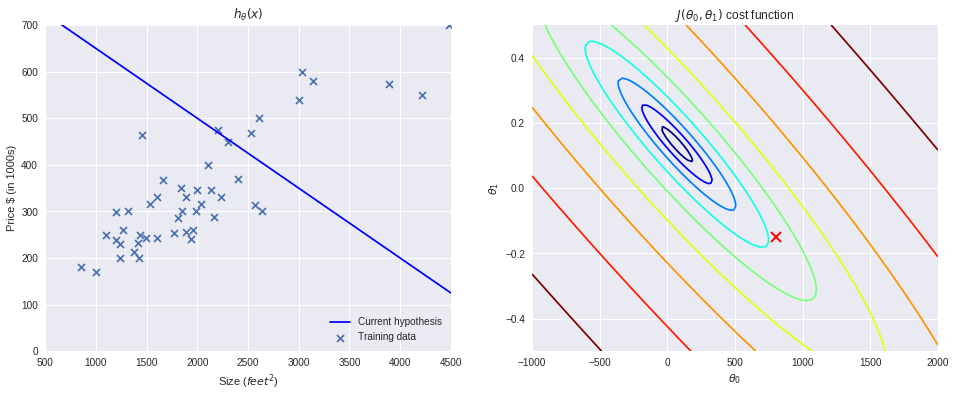

In [29]:
# change these in order to see how the hypothesis changes and the cost function changes
# as a function of the theta0 and theta1 parameters
theta0 = 800.0
theta1 = -0.15

# load the full 47 item data set again
house = pd.read_csv('data/housing-prices-portland-or.csv')
house.price = house.price / 1000.0 # rescale price in 1000s of $
x = house.sqft.as_matrix()
y = house.price.as_matrix()

# set up figure
fig = plt.figure(figsize=(16,6))

### LEFT subplot
# show training data as scatter plot and show a fitted hypothesis for a given
# hypothesis theta0, theta1
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker='x', label='Training data')

# display line representing the theta0, theta1 hypothesis
model_x = np.linspace(0, 4500, 100)
hypothesis_y = theta0 + theta1 * model_x
plt.plot(model_x, hypothesis_y, 'b-', label='Current hypothesis')

plt.axis([500, 4500, 0, 700])
plt.legend(loc=4)
plt.xlabel('Size ($feet^2$)')
plt.ylabel('Price $ (in 1000s)')
plt.title('$h_\\theta(x)$')

### RIGHT subplot
# show contour plot of the cost function J
plt.subplot(1, 2, 2)
t0 = np.linspace(-1000, 2000, 100)
t1 = np.linspace(-0.5, 0.5, 100)
T0, T1 = np.meshgrid(t0, t1)
cost = cost_function_2(T0, T1)

p = plt.contour(T0, T1, np.log(cost), 10, cmap=plt.cm.jet)

#cb = fig.colorbar(p, shrink=0.8) # uncomment if you want to see colorbar showing log value of the cost
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')

# plot the location of theta0, theta1 on the contour plot
plt.plot(theta0, theta1, 'rx', ms=10.0, mew=2.0)
plt.title('$J(\\theta_0, \\theta_1)$ cost function');

You should try various values of theta0 and theta1 in the previous
cell and make sure you understand the relationship between
the hypothesis and the cost functions.  Try and minimize the
cost function by hand.  You know you have minimized the cost function
when you get the `X` at the bottom of the bowl defined by the contour plot.

In particular, see if you can determine the values of theta0 and theta1 that
correspond to the minimum.  Do this before running the cell below.  How close did
you get to finding the minimum value by hand?

In [30]:
# use polyfit to determine the values that minimize the cost function
# for this housing data
# fit a line (degree 1 polynomial) to the data
coef = np.polyfit(x, y, 1)
theta = np.poly1d(coef)

# recall that poly1d returns the intercept in in index 1 and the slope 
# in index 0, so we have to reverse them to get the minimized slope/intercept
# uncomment the next two to see the true minimum slope and intercept values
#print("minimum intercept:", theta[0])
#print("minimum slope:", theta[1])

So then finally, we don't want to manually plot out this cost function and
manually explore the theta parameters to try and minimize, we want an algorithm
that will do this for us.  Also you should realize, that we can just visualize
the cost function when we have a univariate training data set, because in that
case our hypothesized linear model has 2 parameters ($\theta_0$ intercept
and $\theta_1$ slope), and thus the cost function can be visualized in 3
dimensions (like the 3D surface plot) or 2 dimensions using color to visualize
the cost contours (the contour plot we used here). But as soon as you have 2
or more input features, we would need more than a 3 dimensional plot to
visualize the cost function space.  

So in short, we need a procedure to minimize the cost function that can be
done algorithmically, because we will be unable to do it efficiently, or at
all, for real more complex training data sets.

# Video W1 08: Gradient Descent


[YouTube Video Link](https://www.youtube.com/watch?v=P3K38HusyV4&index=8&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

Gradient descent is a general algorithm that is used all over in machine learning,
not just for linear regression.  In fact, whenever you have something like
a cost function, you can minimize or maximize the function using gradient descent.


## Gradient Descent Algorithm

Given we have some cost (objective) function: $J(\theta_0, \theta_1)$

And our goal is we want to minimize the cost function over the parameters:

$$
\genfrac{}{}{0}{}{\textrm{minimize}}{\theta_0, \theta_1} \;\; J(\theta_0, \theta_1)
$$

The outline of our gradient descent algorithm is then:

1. Start with some initial $\theta_0, \theta_1$.

2. Keep changing $\theta_0, \theta_1$ in small ways that
   always reduce $J(\theta_0, \theta_1)$ until we hopefully end up at a minimum.

In order to do this, we need to be able to look around at the cost function
landscape from our current location, and determine which *directions* causes
our cost to go down (we are descending the gradient landscape) and which
directions cause us to go up the cost gradient.

This idea can be visualized as the landscape of the cost function, where the
gradient is defined by the particular cost function $J(\theta_0, \theta_1)$
in our current example, and the directions we can take steps in correspond
to the $\theta$ parameters of our hypothesis/model.

Gradient descent is deterministic, iterative algorithm.  This means if
you always start at the same point, and always use the same learning rate,
you will always converge to the same minimum. However gradient descent
does have some drawbacks.  As demonstrated in the video, gradient descent
is not guaranteed to find the global minimum.  Depending on your
starting location, it will find a minimum in the cost landscape, but the
minimum it finds may not be a global minimum.  Another drawback is that
gradient descent is not necessarily guaranteed to converge (to come to
a stop).  This can happen if the learning rate parameters are not set
carefully in the gradient descent algorithm.  We will return to these
points later.

However, in regards to the first drawback, if your cost function only
has a single global minimum, then gradient descent will either converge
to that minimum (or possible diverge if the learning rate is too big).

In mathematical / pseudo-code notation, this is the definition of the
gradient descent algorithm:

`repeat until convergence` 
{

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) $$

}

Where $\alpha$ is a learning rate parameter, and the $:=$ represents an
assignment operator, where we assign the new value of $\theta_j$ each
step using the equation on the right hand side.  Also
make sure that you correctly update all of the $\theta$ parameters
simultaneously, as discussed in the video.

The $\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ term in
the above gradient descent equation denotes the derivative of the
cost function with respect to one of the $\theta$ parameters.  We will
derive this in more detail later.  But for now, think of it in this way.
Look at the picture example of the cost function landscape.  If you are
at some marked location in the landscape, you can look along one of the
parameter directions ($\theta_0$ or $\theta_1$).  In one direction along
that axis, the cost or gradient will be going up, and in the other direction
it will be decreasing and going down.  Which direction leads to going down
can be found by calculating the derivative at that point with respect to
one of the $\theta$ parameters.  This is what the derivative term in the
gradient descent algorithm does.  If you have studied calculus, you will have
run across derivatives and how to calculate them.  As we will see, it is really
not that difficult to calculate the partial derivative with respect to our
model parameters, and then use this information to take small steps that
lead down the cost gradient towards a minimum.  This in a nutshell is how
and why the gradient descent algorithm works.

# Video W1 09: Gradient Descent Intuition


[YouTube Video Link](https://www.youtube.com/watch?v=4SVqZaY55qo&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=9)


## Using the Derivative to make small steps that reduce the cost function

The derivative is the slope of the line tangent to some point of the
function.  The slope at some point gives us a measure of the rate of
change of the function (how fast it is changing).  Also, the
sign of the derivative tells us in which direction the function is
increasing, and in which it is decreasing.  So in short, the sign of
the derivative lets us know which direction we should go to
cause the function to be reduced, which is very handy when we are
trying to minimize a function.

Besides intuitively understanding how the derivative allows us to
minimize the function, also make sure you understand the discussion
about the learning rate.  In short, for the gradient descent algorithm,
the learning rate constrains the steps we take so that they are neither
too small, nor too large such that we end up not converging on the minimum.

# Video W1 10: Gradient Descent for Linear Regression


[YouTube Video Link](https://www.youtube.com/watch?v=ns8apGrLhaY&index=10&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

## Deriving the Partial Derivative Term

This lecture video gives some more details on deriving the partial
derivative terms that are essential to implement the gradient descent
algorithm.  You should try and understand the derivation given in
the video, but ultimately if you are a little fuzzy, it will be ok
if you at least understand the final definitions of the derivatives, 
that we will use to implement the gradient descent algorithm.


After deriving what the derivative of the cost function is, we get this form for the gradient
descent algorithm.

`repeat until convergence` {

$$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \big( h_\theta(x^{(i)}) - y^{(i)} \big) $$

$$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \big( h_\theta(x^{(i)}) - y^{(i)} \big) \cdot x^{(i)} $$

}



## Showing how Gradient Descent Works

One of the issues we have seen is that gradient descent can converge
to a local optimum.  However, this is not a problem in linear
regression because the cost function will always form a bowl shaped
function, which means that it doesn't have any local optima.  Thus
gradient descent on the cost functions we have defined will be
guaranteed to find the global minimum (as long as the learning
rate is not too large, which can cause divergence, as we  have seen).


# Video W1 11: What's Next


[YouTube Video Link](https://www.youtube.com/watch?v=uZSJklsBjBg&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=11)

## Advantages and Disadvantages



In [31]:
%load_ext version_information

%version_information numpy, scipy, matplotlib, pandas, sklearn

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.4.0
OS Linux 4.13.0 46 generic x86_64 with debian stretch sid
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
pandas 0.20.1
sklearn 0.18.1
Sat Aug 25 20:04:44 2018 CDT